In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px

In [2]:
data_df = pd.read_csv("./data/Speed Dating Data.csv",encoding="Windows-1252" )

In [3]:
data_df.head(5)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
shape_data = data_df.shape
print(f'shape of data:{shape_data}')

shape of data:(8378, 195)


In [5]:
participants = data_df.drop_duplicates(subset='iid', keep='first', inplace=False, ignore_index=False)

<AxesSubplot:xlabel='age', ylabel='Count'>

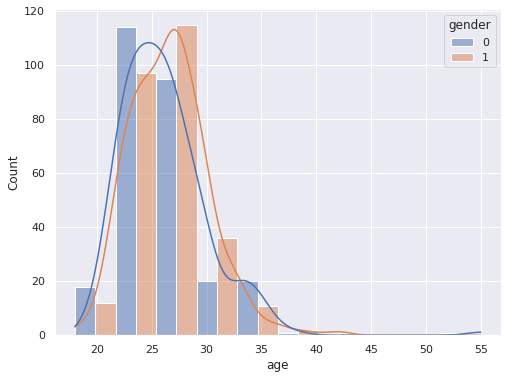

In [6]:
sns.set_theme()
plt.figure(figsize=(8,6))
#fig, axes = plt.subplots(1,2)
#sns.displot(data_df, x='age', hue='gender', kind='kde')
sns.histplot(participants, x='age', hue='gender',kde=True, multiple="dodge", bins=10)


<AxesSubplot:xlabel='age_range', ylabel='Count'>

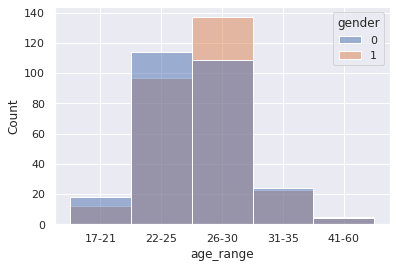

In [7]:
participants['age'].value_counts(normalize=False, bins=9)
participants['age_range'] = pd.cut(participants['age'], bins=[17, 21, 25, 30, 35, 60], labels=['17-21', '22-25', '26-30', '31-35', '41-60'])
sns.histplot(participants, x='age_range', hue='gender')

There are more men at ages 26-30 and more women at ages 22-25
More women at ages 17-21

<AxesSubplot:xlabel='gender', ylabel='age'>

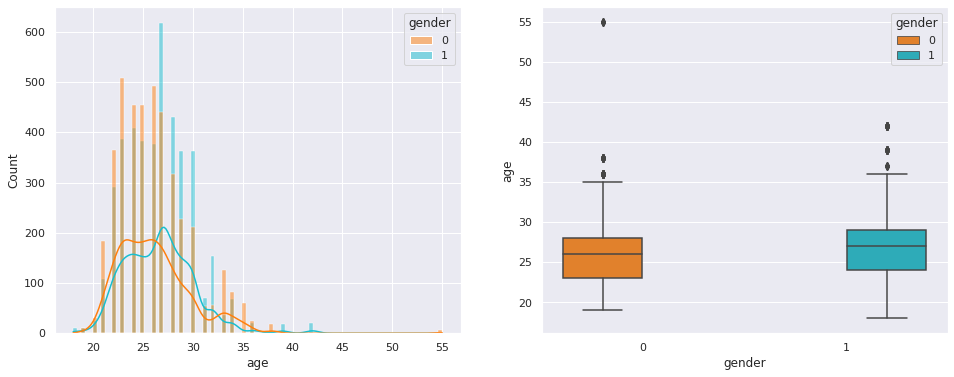

In [30]:
# color palette as dictionary
palette = {1:"tab:cyan",
           0:"tab:orange"}
figure, axes = plt.subplots(1, 2, figsize=(16,6))
sns.histplot(data=data_df, x="age",  hue="gender", ax=axes[0], kde=True, palette=palette);
sns.boxplot(data=data_df, x="gender", y="age", hue='gender', ax=axes[1], palette=palette)

In [8]:
num_features = data_df.select_dtypes(include=np.number).columns
print(f'Number of numerical features:{len(num_features)}')
cat_features = data_df.select_dtypes(exclude=np.number).columns
print(f'Number of categorical features:{len(cat_features)}')

Number of numerical features:187
Number of categorical features:8


### Missing values

In [9]:
threshold = 0.2
missing = (data_df.isna().sum()/shape_data[0]> threshold).values
print('Columns with more than 20% missing values:', missing.sum())
data_df.loc[:,missing].head(5)

Columns with more than 20% missing values: 90


,positin1,undergra,mn_sat,tuition,income,expnum,attr4_1,sinc4_1,intel4_1,fun4_1,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,NaN,NaN,NaN,NaN,"69,487.00",2.0,NaN,NaN,NaN,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,"69,487.00",2.0,NaN,NaN,NaN,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,"69,487.00",2.0,NaN,NaN,NaN,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,"69,487.00",2.0,NaN,NaN,NaN,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,"69,487.00",2.0,NaN,NaN,NaN,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [10]:
not_missing = data_df.loc[:,(data_df.isna().sum() ==0).values].columns.to_list()
not_missing

['iid',
 'gender',
 'idg',
 'condtn',
 'wave',
 'round',
 'position',
 'order',
 'partner',
 'match',
 'samerace',
 'dec_o',
 'dec']

In [11]:
print('Columns with less than 20% missing values')

cols_missing =  set(data_df.columns.to_list()) - set(not_missing) - set(data_df.loc[:,missing].columns)
data_df.loc[:,cols_missing]

Columns with less than 20% missing values


,art,amb2_1,career,like,hiking,pf_o_sin,from,amb3_2,shar1_1,shar,...,sinc3_2,yoga,amb_o,gaming,concerts,amb1_1,dining,pid,reading,exercise
0,1.0,5.0,lawyer,7.0,5.0,20.0,Chicago,6.0,15.0,5.0,...,7.0,1.0,8.0,1.0,10.0,15.0,9.0,11.0,6.0,8.0
1,1.0,5.0,lawyer,7.0,5.0,0.0,Chicago,6.0,15.0,6.0,...,7.0,1.0,7.0,1.0,10.0,15.0,9.0,12.0,6.0,8.0
2,1.0,5.0,lawyer,7.0,5.0,18.0,Chicago,6.0,15.0,7.0,...,7.0,1.0,10.0,1.0,10.0,15.0,9.0,13.0,6.0,8.0
3,1.0,5.0,lawyer,7.0,5.0,5.0,Chicago,6.0,15.0,8.0,...,7.0,1.0,9.0,1.0,10.0,15.0,9.0,14.0,6.0,8.0
4,1.0,5.0,lawyer,6.0,5.0,10.0,Chicago,6.0,15.0,6.0,...,7.0,1.0,9.0,1.0,10.0,15.0,9.0,15.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,10.0,0.0,assistant master of the universe (otherwise it...,2.0,7.0,10.0,France,9.0,0.0,NaN,...,3.0,3.0,6.0,1.0,10.0,0.0,10.0,526.0,8.0,5.0
8374,10.0,0.0,assistant master of the universe (otherwise it...,4.0,7.0,20.0,France,9.0,0.0,NaN,...,3.0,3.0,7.0,1.0,10.0,0.0,10.0,527.0,8.0,5.0
8375,10.0,0.0,assistant master of the universe (otherwise it...,6.0,7.0,10.0,France,9.0,0.0,NaN,...,3.0,3.0,2.0,1.0,10.0,0.0,10.0,528.0,8.0,5.0
8376,10.0,0.0,assistant master of the universe (otherwise it...,5.0,7.0,25.0,France,9.0,0.0,5.0,...,3.0,3.0,3.0,1.0,10.0,0.0,10.0,529.0,8.0,5.0


In [12]:
data_df.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


## Analisys of participants' attributes

In [41]:
attr_signup = ["iid", 'id', 'gender', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode',
            'income', 'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining','museums','art', 'hiking', 'gaming', 'clubbing',
            'reading', 'tv', 'theater', 'movies', 'concerts', 'music','shopping', 'yoga']

In [13]:
attr_participants=["iid", 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'age', "field", "field_cd",
                   "mn_sat", "tuition", "race", "imprace", "imprelig",
                   "from", "zipcode", "income", "goal", "date", "go_out","career", "career_c" ]

attr_meeting = ["iid", 'id', 'condtn', 'position', 'positin1', 'order', 'partner', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att',
                    'dec_o', '']

attr_interests = ["sports", "tvsports", "excersise", "dining", "museums", "art", "hiking", "gaming", "clubbing", "reading"
                  , "tv", "theater", "movies", "concerts", "music", "shopping", "yoga"]

In [14]:
data_df[attr_signup]

,iid,id,gender,age,field,field_cd,undergra,mn_sat,tuition,race,...,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
0,1,1.0,0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
1,1,1.0,0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
2,1,1.0,0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
3,1,1.0,0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
4,1,1.0,0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,25.0,Climate Dynamics,18.0,"Ecole Normale SupŽrieure, Paris",NaN,NaN,2.0,...,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0
8374,552,22.0,1,25.0,Climate Dynamics,18.0,"Ecole Normale SupŽrieure, Paris",NaN,NaN,2.0,...,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0
8375,552,22.0,1,25.0,Climate Dynamics,18.0,"Ecole Normale SupŽrieure, Paris",NaN,NaN,2.0,...,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0
8376,552,22.0,1,25.0,Climate Dynamics,18.0,"Ecole Normale SupŽrieure, Paris",NaN,NaN,2.0,...,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0


### Races distribution

In [73]:
dicts = {'race': {
                1:'Black/African American',
                2: 'European/Caucasian-American',
                3: 'Latino/Hispanic American',
                4: 'Asian/Pacific Islander/Asian-American',
                5: 'Native American'}}
dicts['race'].setdefault(6, 'Other')

'Other'

<AxesSubplot:xlabel='Count', ylabel='race'>

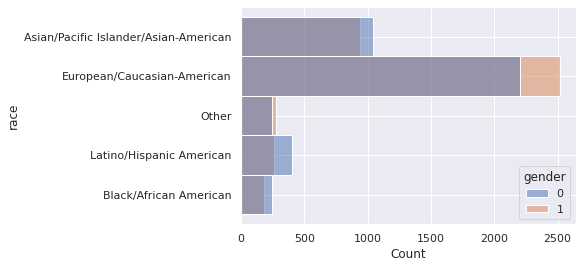

In [16]:
sns.histplot(y=data_df['race'].map(dicts['race']), hue=data_df['gender'])

###  Field of study

In [57]:
dicts['field_cd'] = {
1:'Law', 
2: 'Math',
3: 'Social Science, Psychologist',
4: 'Medical Science, Pharmaceuticals, and Bio Tech',
5:'Engineering',
6: 'English/Creative Writing/ Journalism',
7: 'History/Religion/Philosophy',
8: 'Business/Econ/Finance',
9:'Education, Academia',
10:'Biological Sciences/Chemistry/Physics',
11:'Social Work',
12:'Undergrad/undecided',
13:'Political Science/International Affairs',
14:'Film',
15:'Fine Arts/Arts Administration',
16:'Languages',
17:'Architecture',
18:'Other'
}

In [58]:
participants['decoded_field'] = participants['field_cd'].map(dicts['field_cd'])

In [59]:
participants['decoded_field'].value_counts()

Business/Econ/Finance                             130
Biological Sciences/Chemistry/Physics              61
Engineering                                        56
Law                                                48
Social Science, Psychologist                       46
Political Science/International Affairs            46
Education, Academia                                40
Social Work                                        30
English/Creative Writing/ Journalism               21
History/Religion/Philosophy                        17
Math                                               14
Fine Arts/Arts Administration                      11
Medical Science, Pharmaceuticals, and Bio Tech      9
Film                                                7
Languages                                           3
Other                                               3
Undergrad/undecided                                 1
Architecture                                        1
Name: decoded_field, dtype: 

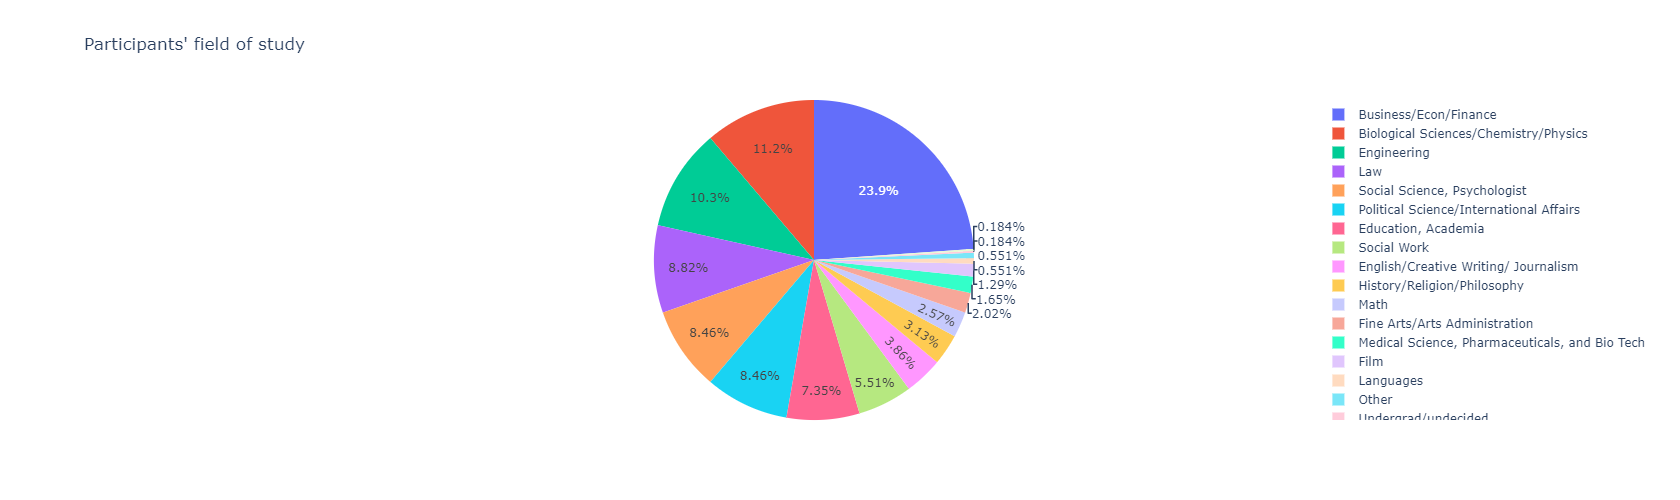

In [72]:
fig = px.pie(participants, 
             names=participants['decoded_field'].value_counts().index, 
             values=participants['decoded_field'].value_counts().values,
             title='Participants\' field of study ')
fig.update_layout(
    autosize=False,
    width=700,
    height=500,

   #paper_bgcolor="LightSteelBlue",
)
fig.show()

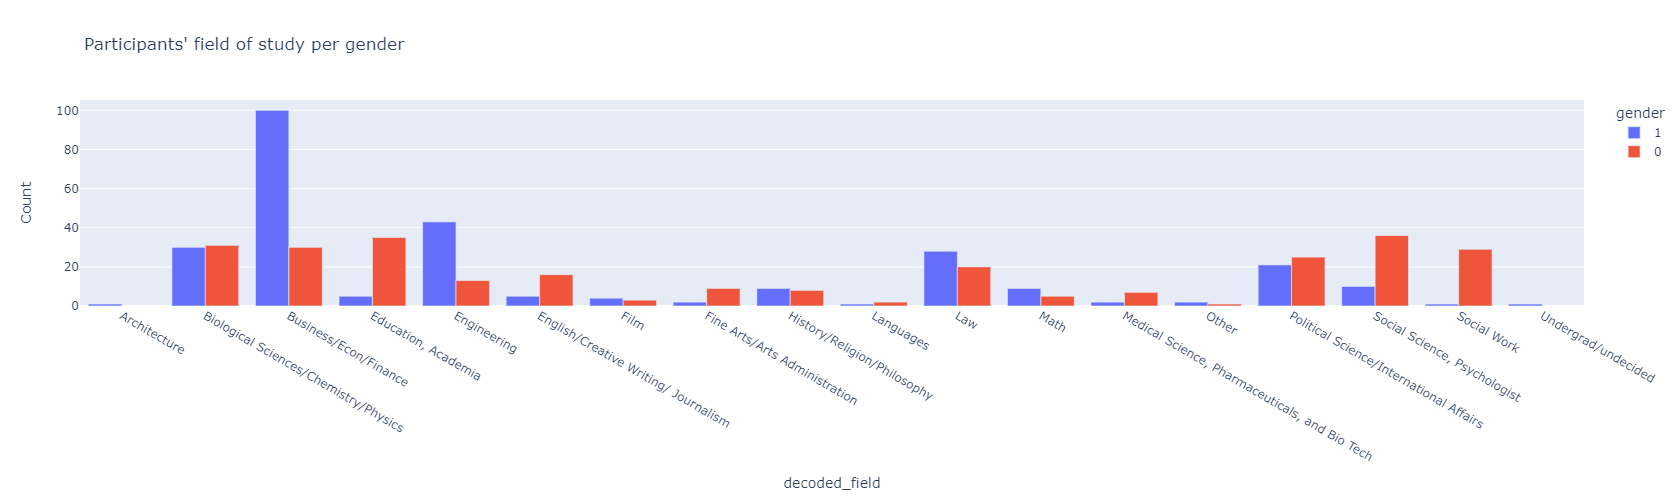

In [111]:
#Group by docoded_field and gender, then count the instances
field_per_gender = participants.groupby(['decoded_field','gender'], as_index=False )['iid'].count()
field_per_gender['gender'] = field_per_gender['gender'].astype('str')
field_per_gender=field_per_gender.rename(columns={"iid":"Count"})
fig = px.bar(field_per_gender, 
             x='decoded_field',
             y='Count',
             color='gender',
             title='Participants\' field of study per gender',
             barmode='group'
           )
fig.update_layout(
    autosize=True,
    height=500,
)
fig.show()

### Importance rate of attributes on a potential date

In [145]:
attr_preference = ["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"]
participants[attr_preference]

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,15.0,20.0,20.0,15.0,15.0,15.0
10,45.0,5.0,25.0,20.0,0.0,5.0
20,35.0,10.0,35.0,10.0,10.0,0.0
30,20.0,20.0,20.0,20.0,10.0,10.0
40,20.0,5.0,25.0,25.0,10.0,15.0
...,...,...,...,...,...,...
8268,40.0,10.0,20.0,10.0,0.0,20.0
8290,20.0,20.0,20.0,20.0,0.0,20.0
8312,30.0,3.0,30.0,30.0,3.0,4.0
8334,40.0,20.0,20.0,20.0,0.0,0.0


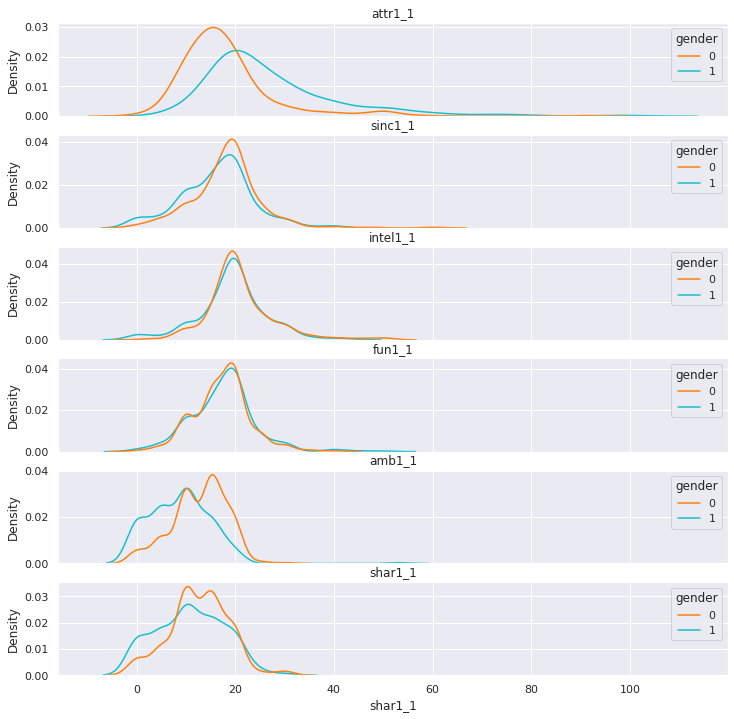

In [146]:
nattributes = len(attr_preference)
#fig = make_subplots(rows=nattributes, cols=1)
fig, axes = plt.subplots(nattributes, 1, figsize=(12,12), sharex=True)
for i, col in enumerate(attr_preference):
    sns.kdeplot(data=participants, x=col, hue='gender', ax=axes[i], palette=palette)
    axes[i].set_title(col)
fig.show()


# What attributes the participants search for?

In [131]:
searched_attributes = ["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1" ]

In [140]:
preferences_df = participants.groupby(['gender'], as_index=False)[searched_attributes].mean()
preferences_df = pd.melt(preferences_df, id_vars="gender", var_name="attribute", value_name="means")
preferences_df

,gender,attribute,means
0,0,attr1_1,18.020372
1,1,attr1_1,27.248800
2,0,sinc1_1,18.222230
3,1,sinc1_1,16.379600
4,0,intel1_1,20.971004
5,1,intel1_1,19.387418
6,0,fun1_1,17.299108
7,1,fun1_1,17.600839
8,0,amb1_1,12.818476
9,1,amb1_1,8.823956


<AxesSubplot:xlabel='attribute', ylabel='means'>

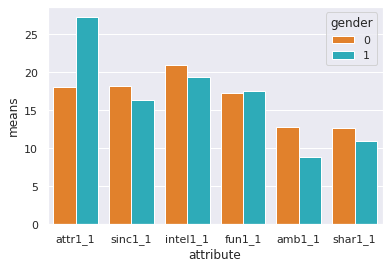

In [144]:
sns.barplot(data=preferences_df, x='attribute', y='means', hue='gender', palette=palette)

In [197]:
attr_attributes = ["iid", "gender", "attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1" ]
ranking_pref = pd.melt(participants[attr_attributes], id_vars=['iid', 'gender'], value_name='points_attribut', var_name='attribute')
df_agg = ranking_pref.groupby(['iid', 'gender','attribute']).agg({'points_attribut':sum})
g = df_agg['points_attribut'].groupby(['iid','gender','attribute'], group_keys=False) #grouping a Series. The index is used to group

res = g.apply(lambda x: x.sort_values(ascending=False))


In [211]:
g.groups[(1, 0, 'amb1_1')]

MultiIndex([(1, 0, 'amb1_1')],
           names=['iid', 'gender', 'attribute'])

In [20]:
cols = ['iid', 'pid', 'partner','order', 'id','gender', 'idg', 'condtn', 'wave', 'round', 'position','positin1',   'match', 'int_corr', 'samerace',
       'age_o', 'race_o', 'pf_o_att', 'dec_o', 'attr_o', 'age', 'field',
        #'field_cd', 'impreling' (doesn-t exist)
        'tuition', 'imprace', 'from', 'zipcode', 'income', 'goal', 'pf_o_sin', 'pf_o_int']

In [21]:
data_df[(data_df.wave == 1) & (data_df.iid ==1)][attr_participants]

,iid,id,gender,idg,condtn,wave,round,position,age,field,...,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c
0,1,1.0,0,1,1,1,10,7,21.0,Law,...,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN
1,1,1.0,0,1,1,1,10,7,21.0,Law,...,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN
2,1,1.0,0,1,1,1,10,7,21.0,Law,...,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN
3,1,1.0,0,1,1,1,10,7,21.0,Law,...,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN
4,1,1.0,0,1,1,1,10,7,21.0,Law,...,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN
5,1,1.0,0,1,1,1,10,7,21.0,Law,...,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN
6,1,1.0,0,1,1,1,10,7,21.0,Law,...,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN
7,1,1.0,0,1,1,1,10,7,21.0,Law,...,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN
8,1,1.0,0,1,1,1,10,7,21.0,Law,...,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN
9,1,1.0,0,1,1,1,10,7,21.0,Law,...,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN


In [22]:
data_df[(data_df.wave == 1) & (data_df.iid ==1)][cols]

,iid,pid,partner,order,id,gender,idg,condtn,wave,round,...,age,field,tuition,imprace,from,zipcode,income,goal,pf_o_sin,pf_o_int
0,1,11.0,1,4,1.0,0,1,1,1,10,...,21.0,Law,NaN,2.0,Chicago,"60,521","69,487.00",2.0,20.00,20.00
1,1,12.0,2,3,1.0,0,1,1,1,10,...,21.0,Law,NaN,2.0,Chicago,"60,521","69,487.00",2.0,0.00,0.00
2,1,13.0,3,10,1.0,0,1,1,1,10,...,21.0,Law,NaN,2.0,Chicago,"60,521","69,487.00",2.0,18.00,19.00
3,1,14.0,4,5,1.0,0,1,1,1,10,...,21.0,Law,NaN,2.0,Chicago,"60,521","69,487.00",2.0,5.00,15.00
4,1,15.0,5,7,1.0,0,1,1,1,10,...,21.0,Law,NaN,2.0,Chicago,"60,521","69,487.00",2.0,10.00,20.00
5,1,16.0,6,6,1.0,0,1,1,1,10,...,21.0,Law,NaN,2.0,Chicago,"60,521","69,487.00",2.0,0.00,30.00
6,1,17.0,7,1,1.0,0,1,1,1,10,...,21.0,Law,NaN,2.0,Chicago,"60,521","69,487.00",2.0,15.00,25.00
7,1,18.0,8,2,1.0,0,1,1,1,10,...,21.0,Law,NaN,2.0,Chicago,"60,521","69,487.00",2.0,11.11,11.11
8,1,19.0,9,8,1.0,0,1,1,1,10,...,21.0,Law,NaN,2.0,Chicago,"60,521","69,487.00",2.0,0.00,25.00
9,1,20.0,10,9,1.0,0,1,1,1,10,...,21.0,Law,NaN,2.0,Chicago,"60,521","69,487.00",2.0,0.00,0.00


Note: Delete either zipcode or income because they are related.

In [23]:
num_rows = data_df.shape[0]

In [74]:
cols_nan = (data_df.isna().sum().sort_values(ascending=False)/num_rows)*100
cols_nan

num_in_3    92.026737
numdat_3    82.143710
expnum      78.515159
sinc7_2     76.665075
amb7_2      76.665075
              ...    
wave         0.000000
condtn       0.000000
idg          0.000000
gender       0.000000
dec          0.000000
Length: 195, dtype: float64

In [31]:
cols_attribs = ['wave','iid', 'partner', 'pid', "attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1", "attr","sinc","intel","fun","amb", "shar",'like','prob',"match"] 

Note: When the question was to give rating between 1 and 10, the distribution between the variables seems uniform

<AxesSubplot:xlabel='attribute', ylabel='means'>

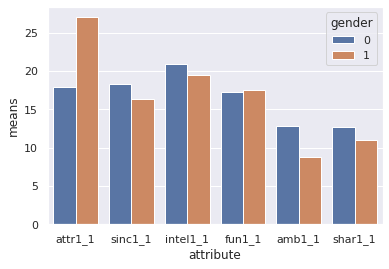

In [45]:
sns.barplot(data=new_pref_mean, x="attribute", y="means", hue="gender")

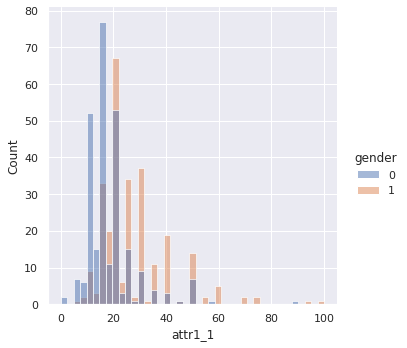

In [46]:
sns.displot(data=preferences_df, x="attr1_1", hue="gender")

<AxesSubplot:xlabel='attr1_1', ylabel='Count'>

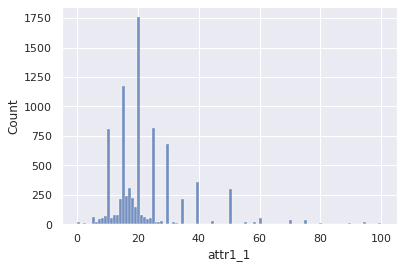

In [47]:
sns.histplot(data=data_df, x='attr1_1')

In [48]:
ratings_scale10 = ["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"] 

In [49]:
corr_matrix = data_df.corr()
corr_matrix

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
iid,1.000000,0.117109,0.051937,0.120362,0.220413,0.996713,0.231881,0.081287,0.070443,0.090696,...,-0.003738,-0.005157,-0.117348,0.039944,-0.020409,0.092325,-0.053698,0.006949,0.100164,0.055229
id,0.117109,1.000000,-0.011623,0.998029,0.318768,0.091571,0.374462,0.168382,0.174008,0.149216,...,0.024213,-0.041815,-0.051621,-0.029917,0.010202,-0.018183,-0.007993,-0.088398,-0.046558,-0.119108
gender,0.051937,-0.011623,1.000000,0.033645,-0.002627,-0.001264,0.020630,-0.001091,0.005853,0.006685,...,-0.125433,-0.159709,0.023925,-0.144642,-0.058300,-0.103692,-0.289694,0.076538,-0.067432,0.055267
idg,0.120362,0.998029,0.033645,1.000000,0.324838,0.092645,0.387715,0.171495,0.177639,0.154691,...,0.020597,-0.051671,-0.051081,-0.036368,0.007404,-0.020785,-0.022967,-0.086071,-0.050316,-0.118940
condtn,0.220413,0.318768,-0.002627,0.324838,1.000000,0.219627,0.816316,0.329120,0.308641,0.324108,...,0.082965,0.034376,0.067836,0.066229,0.023614,0.068552,-0.063407,0.068622,0.114254,0.145598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
attr5_3,0.092325,-0.018183,-0.103692,-0.020785,0.068552,0.092906,0.025047,0.073360,0.201356,0.009776,...,0.851922,0.177047,0.444624,0.400945,0.222258,1.000000,0.197948,0.378176,0.406725,0.205368
sinc5_3,-0.053698,-0.007993,-0.289694,-0.022967,-0.063407,-0.028111,-0.027437,0.099616,0.102406,-0.010260,...,0.222731,0.614853,0.313755,0.184837,0.130029,0.197948,1.000000,0.505440,0.331171,0.268553
intel5_3,0.006949,-0.088398,0.076538,-0.086071,0.068622,0.000644,0.000923,0.093856,0.112979,-0.000037,...,0.351189,0.275642,0.681735,0.251750,0.263402,0.378176,0.505440,1.000000,0.270181,0.424972
fun5_3,0.100164,-0.046558,-0.067432,-0.050316,0.114254,0.103025,0.105866,0.148984,0.236393,0.043915,...,0.388431,0.172901,0.292684,0.775198,0.336507,0.406725,0.331171,0.270181,1.000000,0.398011


<AxesSubplot:>

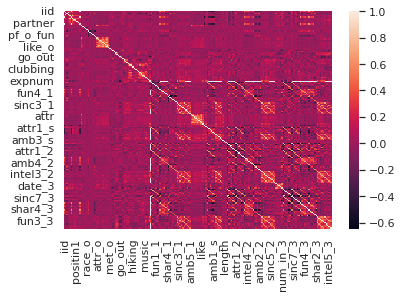

In [50]:

sns.heatmap(data=corr_matrix)

In [51]:
corr_matrix.loc[cols_attribs,'match'].sort_values(ascending=False)

match       1.000000
like        0.305723
fun         0.277545
shar        0.270679
attr        0.260676
prob        0.255531
intel       0.169532
sinc        0.164449
amb         0.140042
fun1_1      0.041652
attr1_1     0.014950
intel1_1    0.014087
partner    -0.001041
amb1_1     -0.004444
iid        -0.015806
pid        -0.016343
wave       -0.017404
sinc1_1    -0.032325
shar1_1    -0.048318
Name: match, dtype: float64

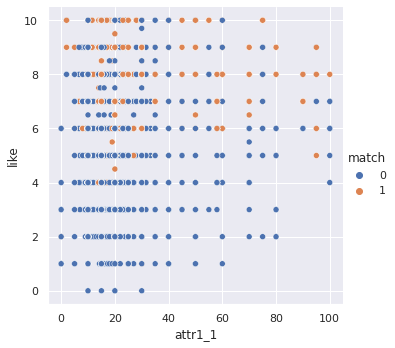

In [52]:
sns.relplot(data=data_df, x="attr1_1", y="like", hue="match")

In [53]:
from pandas.plotting import scatter_matrix

In [54]:
num_attr = ["age_o", "attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1","attr1_2", "sinc1_2", "intel1_2", "fun1_2", "amb1_2", "shar1_2", "attr", "intel"]

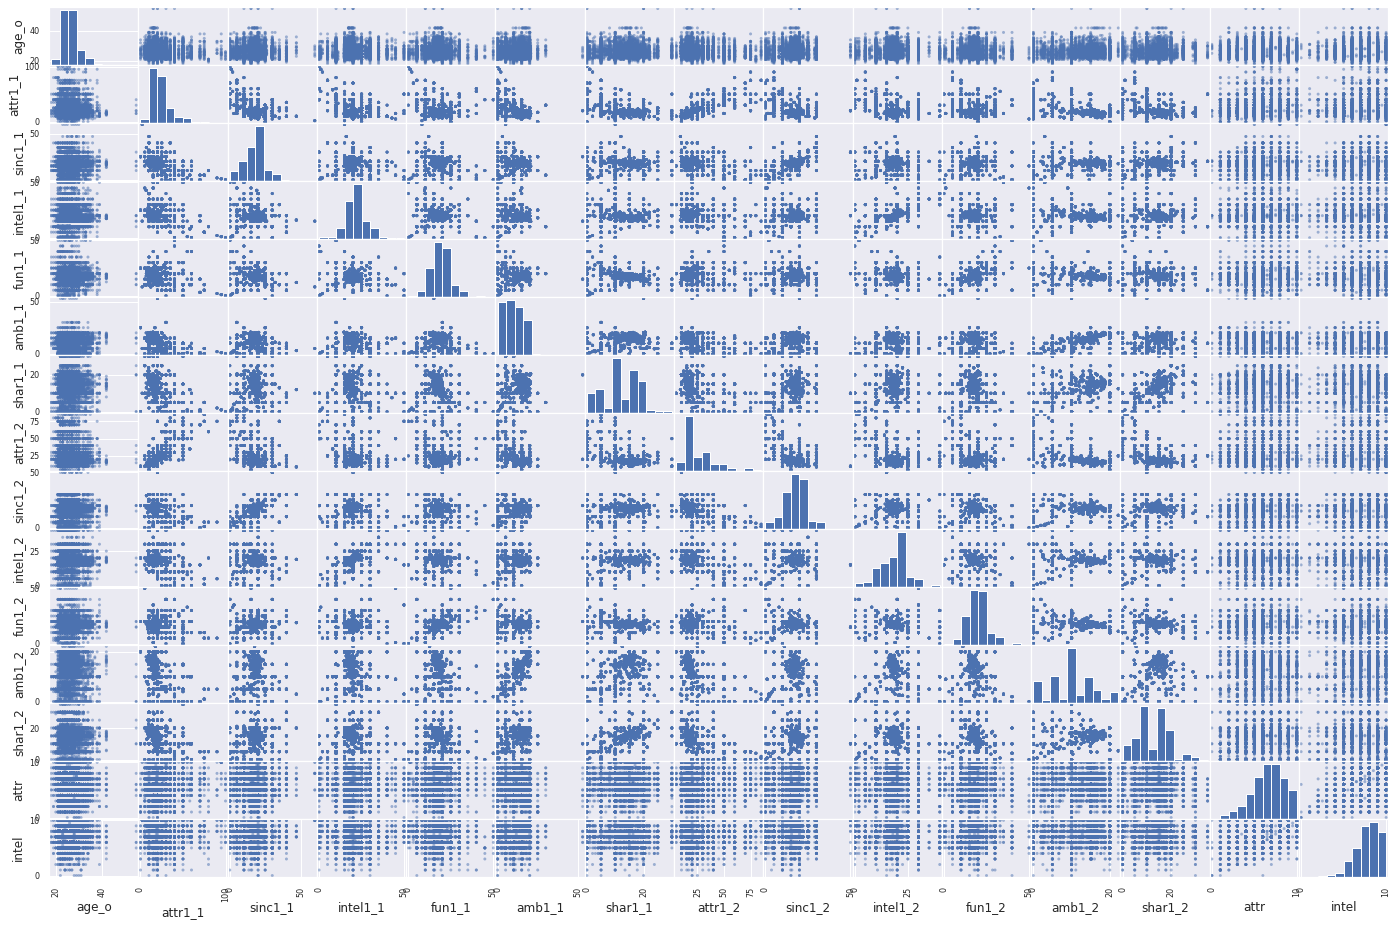

In [55]:
scatter_matrix(data_df[num_attr], figsize=(24,16));

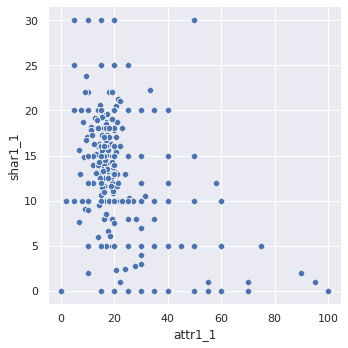

In [56]:
sns.relplot(data=data_df, x="attr1_1", y="shar1_1");

/home/carmina/miniconda3/envs/pez-jedha/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/home/carmina/miniconda3/envs/pez-jedha/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


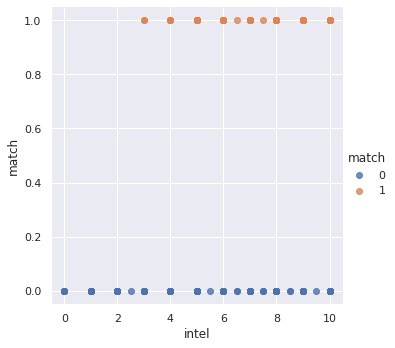

In [57]:
sns.lmplot(data=data_df, x="intel", y="match", logistic=True, hue="match")